# ML Engineer Salary Estimation Project
## Project Overview
- This project aims to estimate the salary of a Machine Learning Engineer based on various features.
- The dataset used for this project is sourced from Kaggle and contains various attributes related to ML Engineer roles.
- The project will involve data preprocessing, exploratory data analysis, model training, and evaluation.

### Dataset Information and Data Ingestion

In [10]:
# Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from ydata_profiling import ProfileReport
import kaggle

# Matplotlib and Seaborn settings
plt.style.use(style="dark_background")
sns.set_style(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)
%matplotlib inline

# Load the dataset from Kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files(
    "chopper53/machine-learning-engineer-salary-in-2024", path="../archive", unzip=True
)

# Load the dataset into a DataFrame
df = pd.read_csv("../archive/salaries.csv")

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

# Dataset Column Information
print("\nCOLUMN INFORMATION:")
print(f"Dataset Shape: {df.shape}")
print(f"Numerical Features {len(numerical_features)}: {numerical_features}")
print(f"Categorical Features {len(categorical_features)}: {categorical_features}")

# Dataset Information
print("\nDATASET INFORMATION:")
df.info()

# Dataset Statistics
print(f"\nDATASET STATISTICS:\n{df.describe()}")

Dataset URL: https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024

COLUMN INFORMATION:
Dataset Shape: (16494, 11)
Numerical Features 4: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
Categorical Features 7: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_

In [11]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


#### Exploratory Data Analysis and Profiling Report

In [12]:
profile_report = ProfileReport(df=df, title="ML Engineer Salary Estimation")
profile_report.to_file("../reports/report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 11176.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


EXPLORATORY DATA ANALYSIS (Refactorizado)


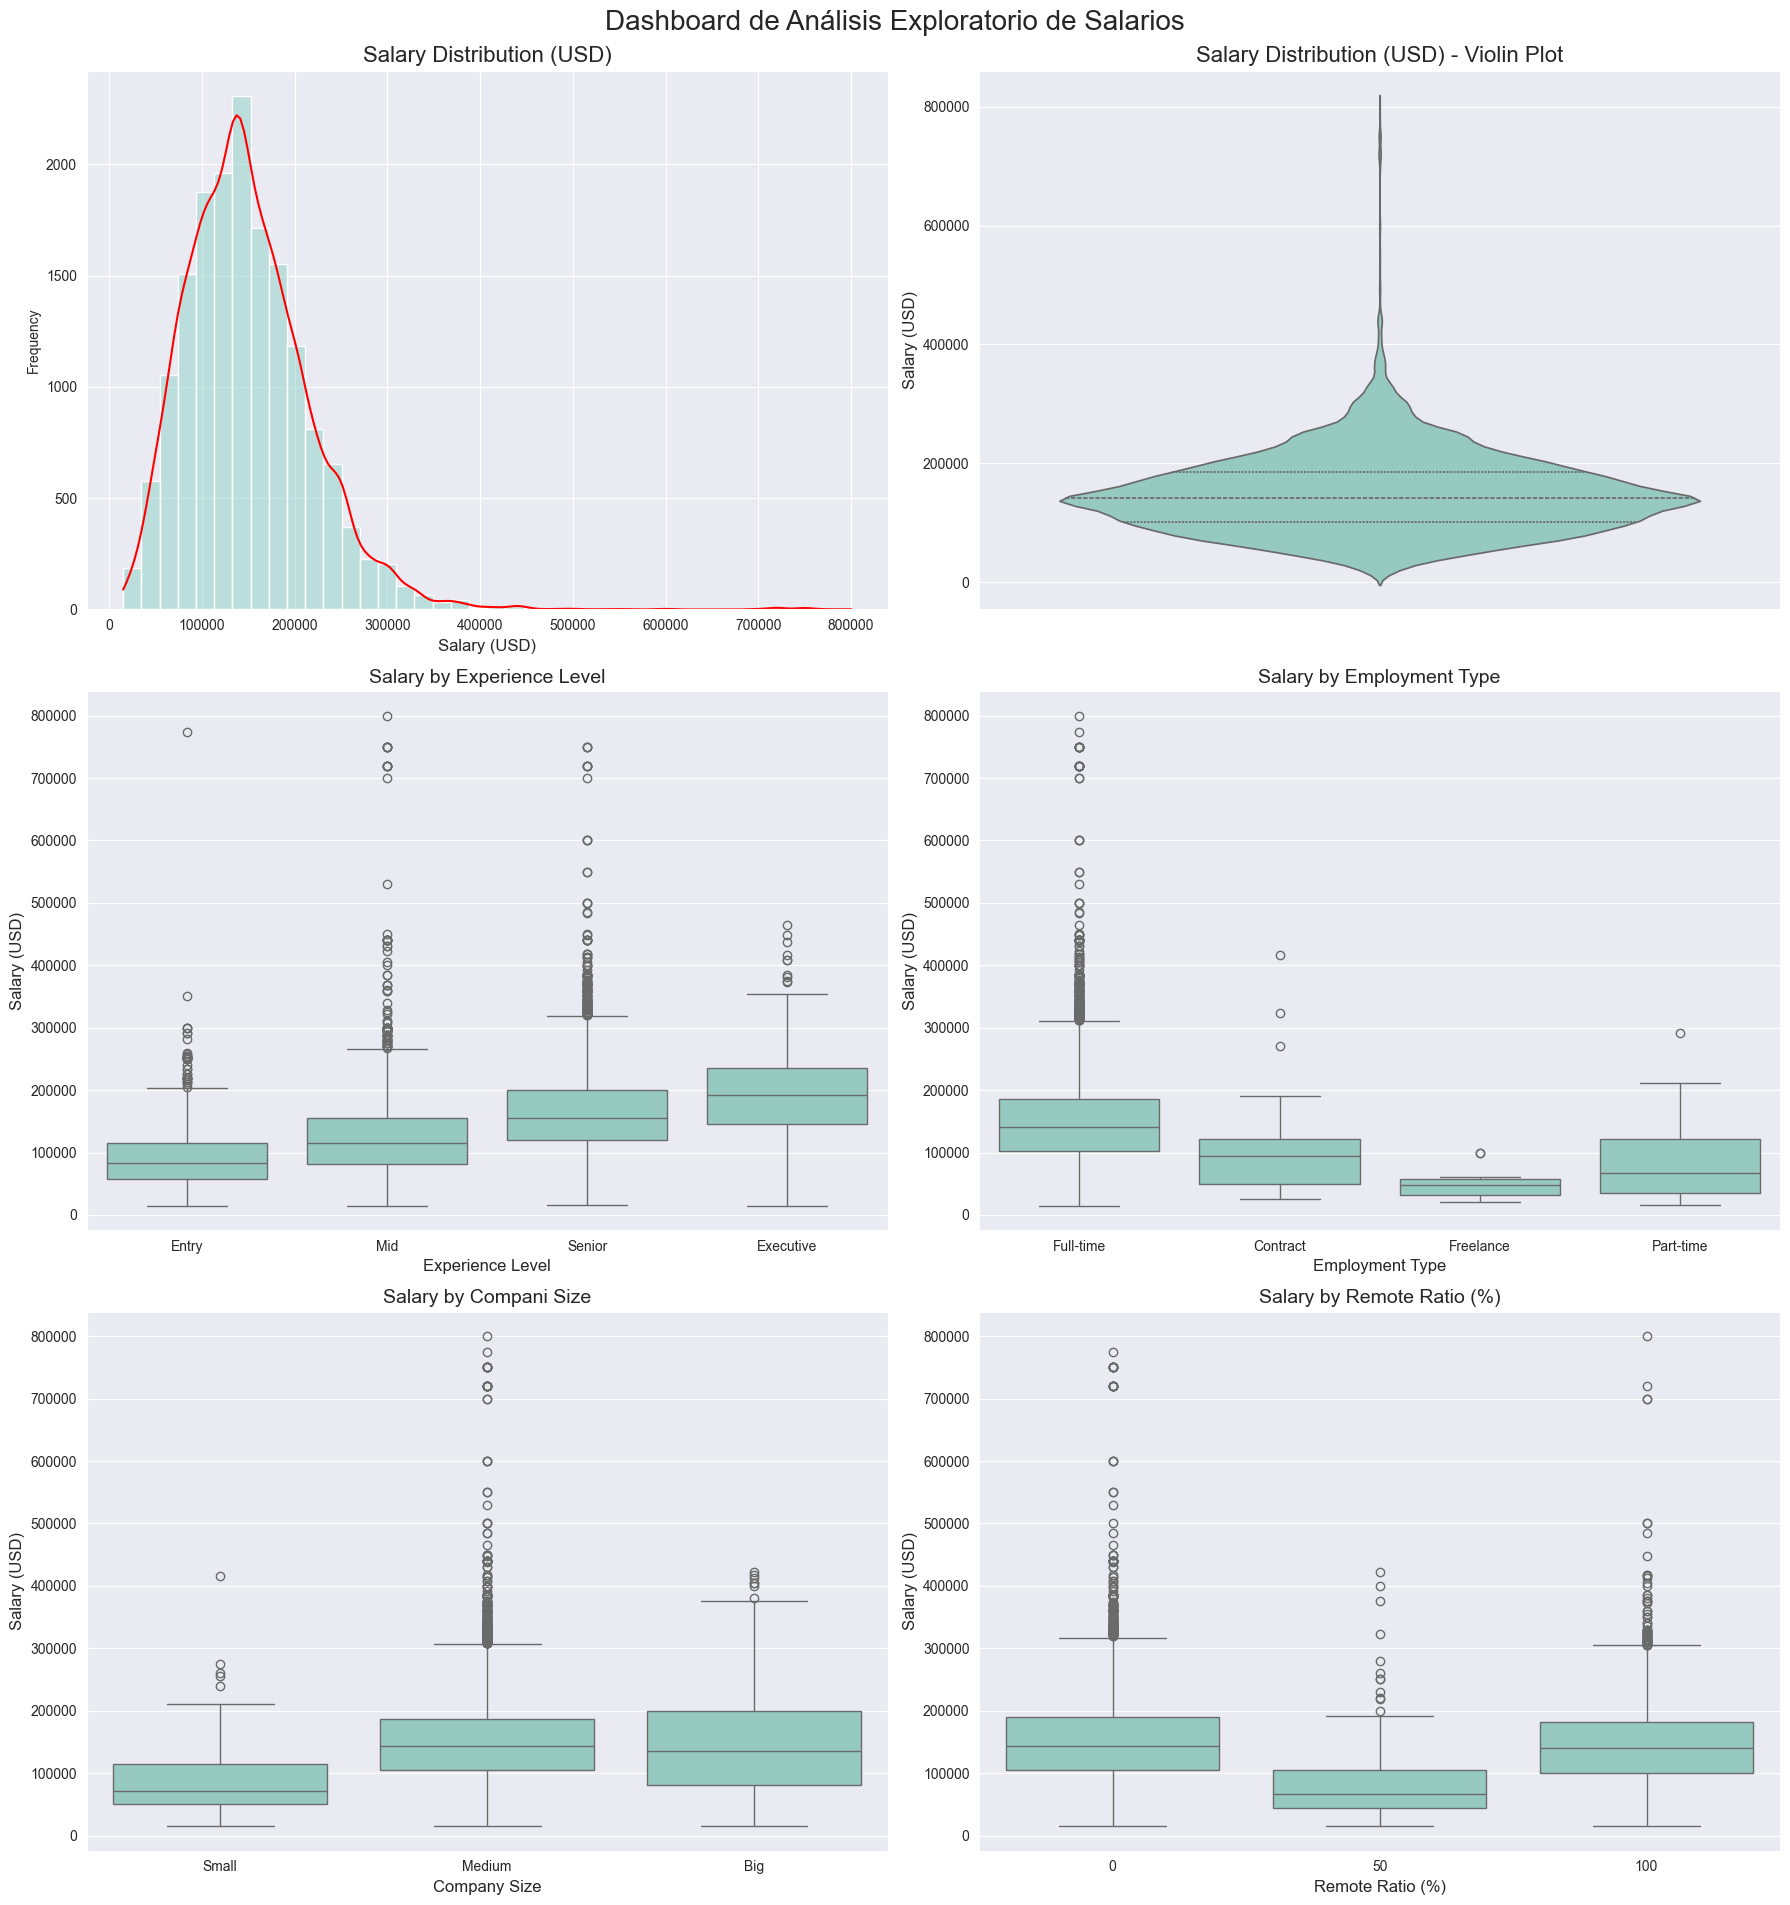

In [13]:
# Plot creation function
def create_boxplot(ax, data, x_col, y_col, title, xlabel, ylabel, order=None):
    sns.boxplot(x=x_col, y=y_col, data=data, ax=ax, order=order)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis="x")


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)

    print("\nEXPLORATORY DATA ANALYSIS (Refactorizado)")

    # Mappings for categorical variables to be more descriptive
    df["experience_level_full"] = df["experience_level"].map(
        {"EN": "Entry", "MI": "Mid", "SE": "Senior", "EX": "Executive"}
    )
    df["employment_type_full"] = df["employment_type"].map(
        {"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"}
    )
    df["company_size_full"] = df["company_size"].map(
        {"S": "Small", "M": "Medium", "L": "Big"}
    )

    # Figure setup
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))
    fig.suptitle("Dashboard de Análisis Exploratorio de Salarios", fontsize=20, y=0.95)

    # Plot 1: Salary Distribution (Histogram)
    ax = sns.histplot(df["salary_in_usd"], bins=40, kde=True, ax=axes[0, 0])
    if ax.lines:
        ax.lines[0].set_color("red")
    axes[0, 0].set_title("Salary Distribution (USD)", fontsize=16)
    axes[0, 0].set_xlabel("Salary (USD)", fontsize=12)
    axes[0, 0].set_ylabel("Frequency")

    # Plot 2: Violin Plot of Salary Distribution
    sns.violinplot(y="salary_in_usd", data=df, ax=axes[0, 1], inner="quartile")
    axes[0, 1].set_title("Salary Distribution (USD) - Violin Plot", fontsize=16)
    axes[0, 1].set_ylabel("Salary (USD)", fontsize=12)
    axes[0, 1].set_xlabel("")

    # Plot 3: Salary vs. Experience Level
    create_boxplot(
        axes[1, 0],
        df,
        "experience_level_full",
        "salary_in_usd",
        "Salary by Experience Level",
        "Experience Level",
        "Salary (USD)",
        order=["Entry", "Mid", "Senior", "Executive"],
    )

    # Plot 4: Salary vs. Employment Type
    create_boxplot(
        axes[1, 1],
        df,
        "employment_type_full",
        "salary_in_usd",
        "Salary by Employment Type",
        "Employment Type",
        "Salary (USD)",
        order=["Full-time", "Contract", "Freelance", "Part-time"],
    )

    # Plot 5: Salary vs. Company Size
    create_boxplot(
        axes[2, 0],
        df,
        "company_size_full",
        "salary_in_usd",
        "Salary by Compani Size",
        "Company Size",
        "Salary (USD)",
        order=["Small", "Medium", "Big"],
    )

    # Plot 6: Salary vs. Remote Ratio
    create_boxplot(
        axes[2, 1],
        df,
        "remote_ratio",
        "salary_in_usd",
        "Salary by Remote Ratio (%)",
        "Remote Ratio (%)",
        "Salary (USD)",
    )

    plt.tight_layout(
        rect=[0, 0, 1, 0.96]
    )  # Ajustar layout para dejar espacio al super-título
    plt.show()

Text(0.5, 0, 'Log(Salary)')

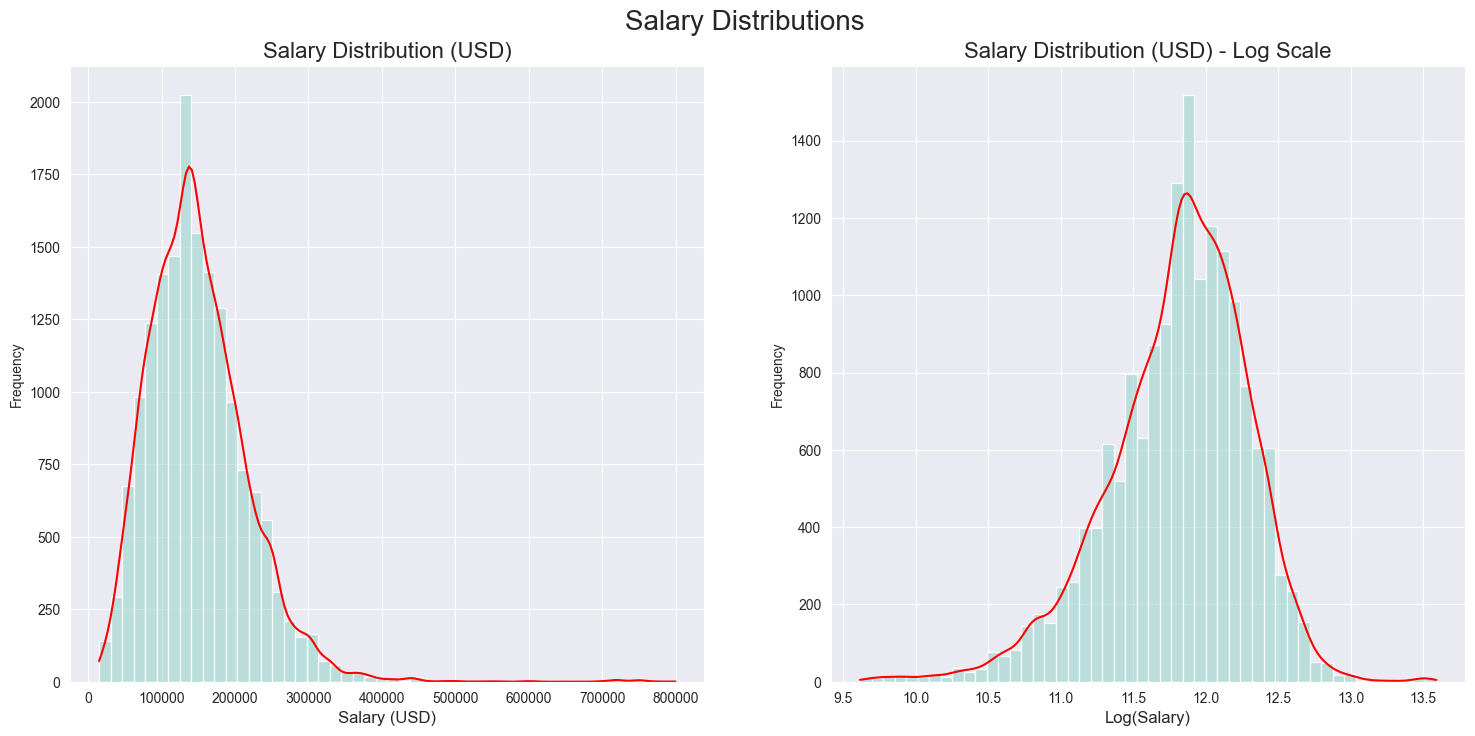

In [14]:
# Figure setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle("Salary Distributions", fontsize=20, y=0.95)

# Plot 1: Salary Distribution (Histogram)
ax = sns.histplot(df["salary_in_usd"], bins=50, kde=True, ax=axes[0])
if ax.lines:
    ax.lines[0].set_color("red")
axes[0].set_title("Salary Distribution (USD)", fontsize=16)
axes[0].set_xlabel("Salary (USD)", fontsize=12)
axes[0].set_ylabel("Frequency")

# Plot 2: Logarithmic Salary Distribution
df["log_salary_in_usd"] = np.log1p(df["salary_in_usd"])
ax1 = sns.histplot(df["log_salary_in_usd"], bins=50, kde=True, ax=axes[1])
if ax1.lines:
    ax1.lines[0].set_color("red")
axes[1].set_title("Salary Distribution (USD) - Log Scale", fontsize=16)
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Log(Salary)", fontsize=12)

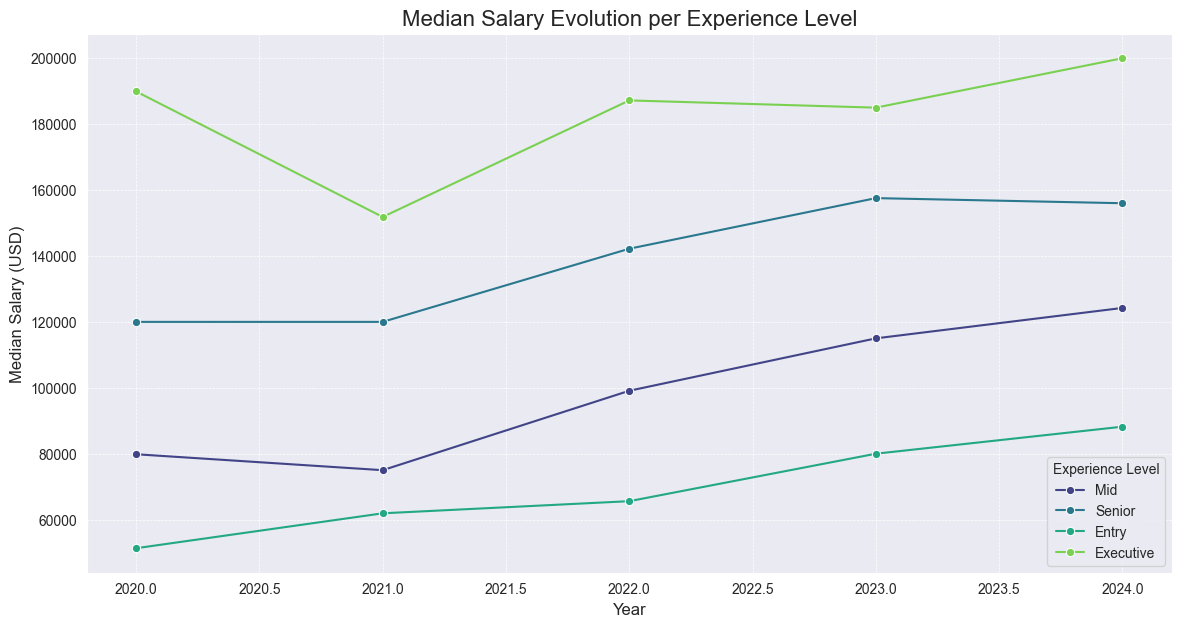

In [15]:
# Evalution of median salary over the years
plt.figure(figsize=(14, 7))
sns.lineplot(
    x="work_year",
    y="salary_in_usd",
    data=df,
    estimator="median",
    errorbar=None,
    marker="o",
    hue="experience_level_full",
    palette="viridis",
)
plt.title("Median Salary Evolution per Experience Level", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Salary (USD)", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Experience Level")
plt.show()

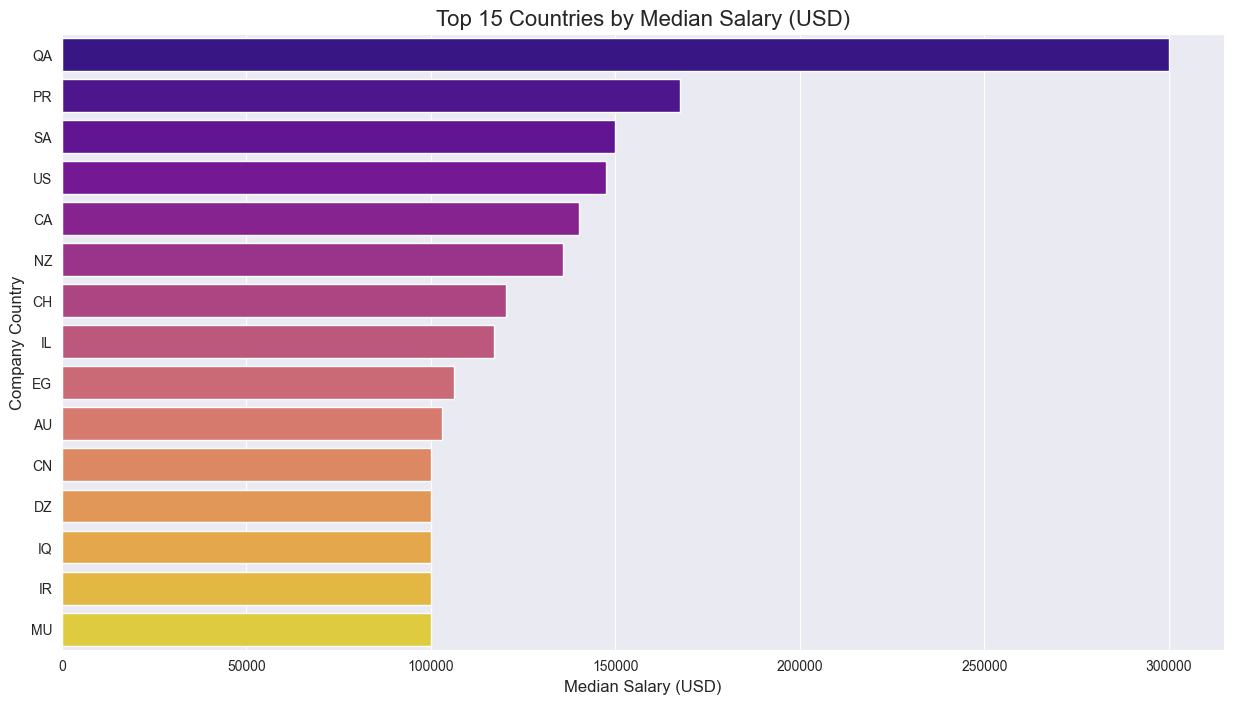

Top 15 Countries by Median Salary (USD):
                    median  count
company_location                 
QA                300000.0      1
PR                167500.0      4
SA                150000.0      3
US                147550.0  14478
CA                140000.0    455
NZ                135710.0      8
CH                120402.0      9
IL                117029.5      4
EG                106200.0     13
AU                102927.0     57
CN                100000.0      1
DZ                100000.0      1
IQ                100000.0      1
IR                100000.0      1
MU                100000.0      1


In [16]:
# Calculate median salary and count by company country
top_countries = df.groupby("company_location")["salary_in_usd"].agg(["median", "count"])
top_15_countries = top_countries.nlargest(15, "median").sort_values(
    "median", ascending=False
)

plt.figure(figsize=(15, 8))
sns.barplot(
    x=top_15_countries["median"],
    y=top_15_countries.index,
    palette="plasma",
    hue=top_15_countries.index,
)
plt.title("Top 15 Countries by Median Salary (USD)", fontsize=16)
plt.xlabel("Median Salary (USD)", fontsize=12)
plt.ylabel("Company Country", fontsize=12)
plt.show()

print("Top 15 Countries by Median Salary (USD):")
print(top_15_countries)

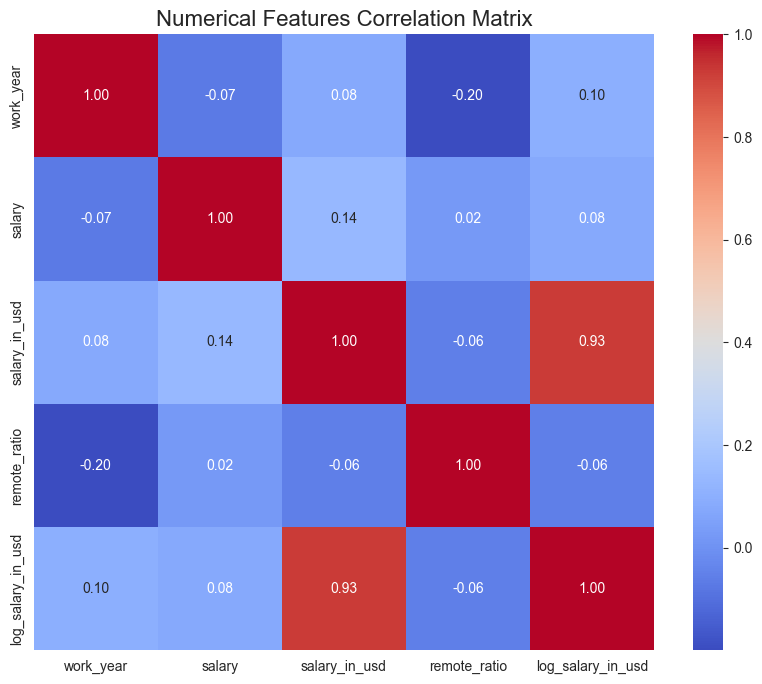

In [17]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Features Correlation Matrix", fontsize=16)
plt.show()

#### Data Cleaning and Preprocessing

In [ ]:
# Checking for missing values
print("\nMISSING VALUES:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print(f"Missing values found in the following columns:\n{missing_values}")
else:
    print("No missing values found in the dataset.")

# Checking for duplicate rows
print("\nDUPLICATE ROWS:")
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Duplicate rows found: {duplicate_rows}")
    df = df.drop_duplicates()
    print("Duplicate rows have been successfully removed.")
else:
    print("No duplicate rows found in the dataset.")

# Droping redundant columns
print("\nDROPPING REDUNDANT COLUMNS:")
df_processed = df.drop(
    [
        "salary",
        "salary_currency",
        "log_salary_in_usd",
        "experience_level_full",
        "company_size_full",
    ],
    axis=1,
)

print("Columns after:")
print(df_processed.columns)


MISSING VALUES:
No missing values found in the dataset.

DUPLICATE ROWS:
Duplicate rows found: 6401
Duplicate rows have been successfully removed.

DROPPING REDUNDANT COLUMNS:
Columns afte:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'employment_type_full'],
      dtype='object')
